#Sprint 9, T01

##Nivell 1

###Execise 1 - Feature selection - working with dataset, normalize categorical atributes with dummy, standarize numerical atributs with StandardScaler

I will analyze data about sport facilities in Catalonia from open data database: https://analisi.transparenciacatalunya.cat/en/Esport/Espais-esportius-i-complementaris-censats-per-muni/v99k-i424
- Dummy variables: https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
- StandardScaler: https://medium.com/@stallonejacob/data-science-scaling-of-data-in-python-ec7ad220b339

In [278]:
#importing libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [319]:
df = pd.read_csv('Catalonia_sport.csv',low_memory=False)

In [320]:
#my dataset
df.head(2)

,Codi Municipi,Comarca,Municipi,Instal·lacions,CAM,ATL,PAL,PCO,POL,PAV,...,NAT,BIC,ITI,VES,GRA,MAG,SER,POR,REF,COM
0,80018,Baix Llobregat,Abrera,28,2,0,8,2,9,2,...,0,2,2,14,7,12,5,0,0,0
1,80023,Bages,Aguilar de Segarra,7,0,0,3,0,1,0,...,0,0,10,1,0,2,3,0,0,0


In [35]:
#dataset main values
df.describe()

,Codi Municipi,Instal·lacions,CAM,ATL,PAL,PCO,POL,PAV,TEN,PAD,...,NAT,BIC,ITI,VES,GRA,MAG,SER,POR,REF,COM
count,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,...,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,212015.223301,21.088457,2.512406,0.466019,11.149946,1.163970,8.998921,1.049622,3.225458,2.053937,...,0.485437,0.866235,2.066882,7.975189,3.425027,4.891046,4.897519,0.056095,0.143474,0.233010
std,125738.815787,61.654990,5.100037,2.381235,34.975526,6.710705,35.860315,3.531059,11.019415,7.866001,...,1.357148,4.725901,3.287494,34.710721,12.984729,23.329872,19.283977,0.317052,0.716903,0.633539
min,80018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82390.500000,4.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,171735.000000,8.000000,1.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,252111.500000,17.000000,3.000000,0.000000,7.000000,1.000000,7.000000,1.000000,3.000000,2.000000,...,0.000000,0.000000,3.000000,7.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000
max,439076.000000,1514.000000,101.000000,51.000000,555.000000,189.000000,960.000000,91.000000,254.000000,165.000000,...,20.000000,100.000000,24.000000,971.000000,353.000000,653.000000,524.000000,5.000000,11.000000,5.000000


In [425]:
df.rename({'Instal·lacions': 'Facilities'}, axis=1, inplace=True)
df.head(2)

,Codi Municipi,Comarca,Municipi,Facilities,CAM,ATL,PAL,PCO,POL,PAV,...,NAT,BIC,ITI,VES,GRA,MAG,SER,POR,REF,COM
0,80018,Baix Llobregat,Abrera,28,2,0,8,2,9,2,...,0,2,2,14,7,12,5,0,0,0
1,80023,Bages,Aguilar de Segarra,7,0,0,3,0,1,0,...,0,0,10,1,0,2,3,0,0,0


In [426]:
#do I need to clean data?
df.isnull().sum().unique()

array([0])

In [427]:
#dummy variables from cathegorical values - Comarca
dummy1 = pd.get_dummies(df['Comarca'])
dummy1.head(2)

,Alt Camp,Alt Empordà,Alt Penedès,Alt Urgell,Alta Ribagorça,Anoia,Bages,Baix Camp,Baix Ebre,Baix Empordà,...,Segarra,Segrià,Selva,Solsonès,Tarragonès,Terra Alta,Urgell,Val d'Aran,Vallès Occidental,Vallès Oriental
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Another categorical variable is municipality but I will remove that information because I would work only with the variable of county.

In [428]:
df2 = df.merge(dummy1, left_index=True, right_index=True)
df2.drop(['Comarca','Municipi','Codi Municipi'], axis=1, inplace=True)
df2.head(2)

,Facilities,CAM,ATL,PAL,PCO,POL,PAV,TEN,PAD,SAL,...,Segarra,Segrià,Selva,Solsonès,Tarragonès,Terra Alta,Urgell,Val d'Aran,Vallès Occidental,Vallès Oriental
0,28,2,0,8,2,9,2,1,8,10,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,3,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [429]:
#StandardScaler - Facilities
from sklearn.preprocessing import StandardScaler
#Initialize
ss = StandardScaler()
#Fit the data - scaling
Xstd = ss.fit_transform(df[['CAM','ATL','PAL','PCO','PCO','POL','PAV','TEN','PAD','SAL','ESQ','FRO',
                            'PET','CON','HIP','GOL','CIR','ROC','SIN','URB','NAT','BIC','ITI','VES',
                            'GRA','MAG','SER','POR','REF','COM']].values)
print(Xstd.mean(), Xstd.std())

7.664970180799355e-19 1.0


In [430]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xstd, df.Facilities.values)

print('Intercept:', lr.intercept_)
print('Coefs:', lr.coef_)

Intercept: 21.088457389428264
Coefs: [ 2.84794210e-01  2.31122515e-01  2.51128342e+01 -3.61943196e+00
 -3.61943196e+00  9.70637834e+00  2.94637561e+00 -1.51483012e-01
  3.60840572e-01  1.11062911e+01 -3.21217641e+00 -4.66508162e-01
  2.78301632e+00  1.35852044e-01  4.49518160e-01  4.03869268e-01
 -9.44523116e-02  7.15517145e-01 -4.44615773e-01  4.27747189e+00
 -1.20454886e-03  4.73008360e+00  7.00835527e-01  1.32889689e+01
  2.89954710e+00 -2.61735488e-01  5.07911464e-01  4.29981175e-01
  6.74823926e-01  2.82301926e-01]


Interpretation: 
- For exemple for 1 standard deviation increase in CAM facility (normal sports pitch) estimates 0.0284 total number of sport facilities in Catalonia. 
- For 1 standard deviation increase in ATL facility (athletics pitch) estimates 0.0231 total number of sport facilities in Catalonia and so on.

##Nivell 2

##Execise 2 - Feature extraction, application of PCA

PCA - Principal component analysis
- Standardize the Data - makes it easier to compare different quantity measurements with each other.
- Projection to 2D - Rescaling model to smaller dimension.

In [329]:
df.head(5)

,Codi Municipi,Comarca,Municipi,Facilities,CAM,ATL,PAL,PCO,POL,PAV,...,NAT,BIC,ITI,VES,GRA,MAG,SER,POR,REF,COM
0,80018,Baix Llobregat,Abrera,28,2,0,8,2,9,2,...,0,2,2,14,7,12,5,0,0,0
1,80023,Bages,Aguilar de Segarra,7,0,0,3,0,1,0,...,0,0,10,1,0,2,3,0,0,0
2,80039,Maresme,Alella,61,3,1,52,2,14,1,...,0,2,1,13,8,10,12,0,0,0
3,80044,Osona,Alpens,3,1,0,0,0,2,0,...,0,0,0,1,1,0,1,0,0,0
4,80057,Vallès Oriental,"Ametlla del Vallès, l'",22,2,0,6,2,9,2,...,0,2,4,12,5,3,5,0,0,1


In [271]:
df = pd.read_csv('Catalonia_sport.csv',low_memory=False)
df['Comarca'].unique()#Names of all regions

array(['Baix Llobregat', 'Bages', 'Maresme', 'Osona', 'Vallès Oriental',
       'Berguedà', 'Alt Penedès', 'Barcelonès', 'Anoia', 'Moianès',
       'Garraf', 'Vallès Occidental', 'Selva', 'Alt Empordà', 'Gironès',
       'Baix Empordà', 'Cerdanya', 'Garrotxa', "Pla de l'Estany",
       'Ripollès', 'Noguera', 'Urgell', 'Segrià', 'Alt Urgell',
       'Garrigues', 'Pallars Sobirà', "Val d'Aran", "Pla d'Urgell",
       'Alta Ribagorça', 'Segarra', 'Solsonès', 'Pallars Jussà',
       'Alt Camp', 'Baix Penedès', 'Baix Camp', 'Montsià', 'Baix Ebre',
       'Tarragonès', 'Terra Alta', "Ribera d'Ebre", 'Conca de Barberà',
       'Priorat'], dtype=object)

In [417]:
#Standardize the Data - center the data and divide by standard deviation
from sklearn.preprocessing import StandardScaler
features = ['CAM','ATL','PAL','PCO','PCO','POL','PAV','TEN','PAD','SAL','ESQ','FRO',
                            'PET','CON','HIP','GOL','CIR','ROC','SIN','URB','NAT','BIC','ITI','VES',
                            'GRA','MAG','SER','POR','REF','COM']
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x.mean())
print(x.std())

7.664970180799355e-19
1.0


In [421]:
#PCA Projection from 30 to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [422]:
#Exmplained variance
pca.explained_variance_ratio_

array([0.65093873, 0.06005524])

How much information can be atributed to each of the principal components - First component 65% of the variance and second component 6%. Together the two components contain 71% of the information.

In [328]:
#Concatenating dataframe
finalDf = pd.concat([principalDf,df[['Comarca']]], axis=1)
finalDf

,principal component 1,principal component 2,Comarca
0,0.447251,-0.771352,Baix Llobregat
1,-0.838486,0.539308,Bages
2,1.211756,-0.519188,Maresme
3,-1.175296,-0.774078,Osona
4,0.661635,1.714115,Vallès Oriental
...,...,...,...
922,-0.855893,-0.829919,Baix Ebre
923,-0.705538,-0.436688,Baix Ebre
924,6.833793,2.817874,Tarragonès
925,0.290871,1.078372,Baix Ebre


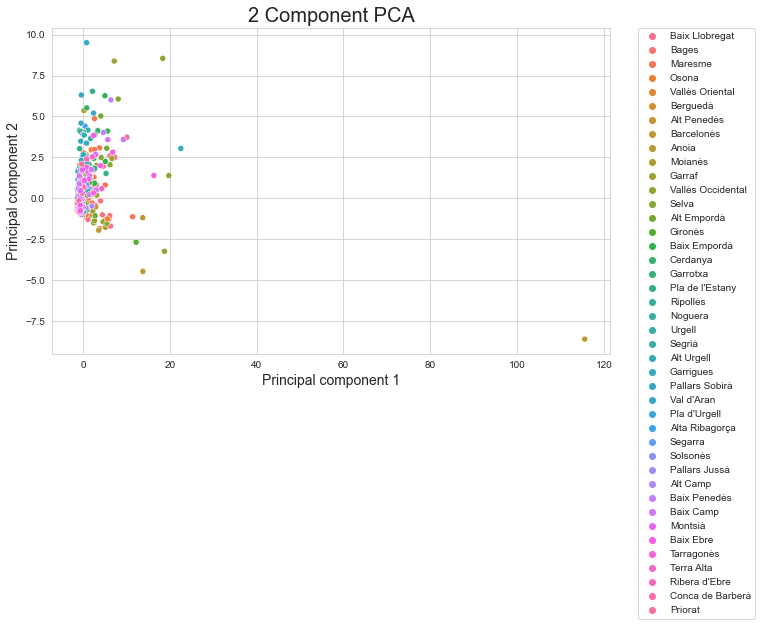

In [354]:
#Visualize 2D Projection
fig, ax = plt.subplots(figsize =(10,6))
sns.set_style("whitegrid")
g = sns.scatterplot(data = finalDf, x='principal component 1', y='principal component 2', hue='Comarca')
plt.title('2 Component PCA', fontsize=20)
plt.xlabel('Principal component 1', fontsize=14)
plt.ylabel('Principal component 2', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show(g)

##Nivell 3

##Execise 3 - Feature transformation, normalization and outliners

The normalization is a process of scaling data - changing the shape. Variables are constained to a specific range. This process helps reduce computational expenses.

In [376]:
nor_df = df.iloc[:,4:30]#working only with the number of each facilities
nor_df.head(5)

,CAM,ATL,PAL,PCO,POL,PAV,TEN,PAD,SAL,ESQ,...,ROC,SIN,URB,NAT,BIC,ITI,VES,GRA,MAG,SER
0,2,0,8,2,9,2,1,8,10,0,...,0,1,10,0,2,2,14,7,12,5
1,0,0,3,0,1,0,0,0,1,0,...,0,4,0,0,0,10,1,0,2,3
2,3,1,52,2,14,1,13,10,14,2,...,0,2,6,0,2,1,13,8,10,12
3,1,0,0,0,2,0,0,0,1,0,...,0,0,2,0,0,0,1,1,0,1
4,2,0,6,2,9,2,7,3,13,0,...,1,2,6,0,2,4,12,5,3,5


In [410]:
#normalization of group of columns
from sklearn import preprocessing
names = nor_df.columns

d = preprocessing.normalize(nor_df, axis=0)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,CAM,ATL,PAL,PCO,POL,PAV,TEN,PAD,SAL,ESQ,...,ROC,SIN,URB,NAT,BIC,ITI,VES,GRA,MAG,SER
0,0.011559,0.000000,0.007161,0.00965,0.007999,0.017841,0.002862,0.032336,0.006791,0.000000,...,0.000000,0.013344,0.027253,0.0,0.013679,0.016922,0.012917,0.017129,0.016543,0.008258
1,0.000000,0.000000,0.002685,0.00000,0.000889,0.000000,0.000000,0.000000,0.000679,0.000000,...,0.000000,0.053376,0.000000,0.0,0.000000,0.084612,0.000923,0.000000,0.002757,0.004955
2,0.017339,0.013543,0.046547,0.00965,0.012443,0.008920,0.037206,0.040421,0.009507,0.026743,...,0.000000,0.026688,0.016352,0.0,0.013679,0.008461,0.011995,0.019576,0.013786,0.019819
3,0.005780,0.000000,0.000000,0.00000,0.001778,0.000000,0.000000,0.000000,0.000679,0.000000,...,0.000000,0.000000,0.005451,0.0,0.000000,0.000000,0.000923,0.002447,0.000000,0.001652
4,0.011559,0.000000,0.005371,0.00965,0.007999,0.017841,0.020034,0.012126,0.008828,0.000000,...,0.018895,0.026688,0.016352,0.0,0.013679,0.033845,0.011072,0.012235,0.004136,0.008258


This is normalized dataset. All vaules are bounded between 0 and 1.

In [375]:
scaled_df.std(axis=0)#standard deviation

CAM    0.029476
ATL    0.032250
PAL    0.031308
PCO    0.032378
POL    0.031873
PAV    0.031498
TEN    0.031537
PAD    0.031795
SAL    0.032338
ESQ    0.032649
FRO    0.032056
PET    0.031819
CON    0.032700
HIP    0.031468
GOL    0.031767
CIR    0.031911
ROC    0.031710
SIN    0.029996
URB    0.031138
NAT    0.030940
BIC    0.032323
ITI    0.027816
VES    0.032027
GRA    0.031774
MAG    0.032162
SER    0.031850
dtype: float64

Another exemple how to normalize values. This time I will work only with one column and visualize the result.

In [415]:
var = df['Facilities']
print(len(var))

927


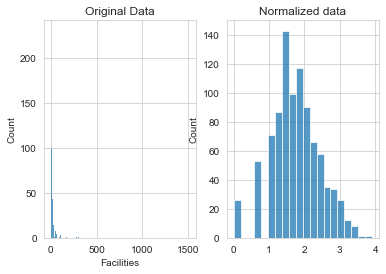

In [409]:
from scipy import stats

normalized_data = stats.boxcox(var)

fig, ax=plt.subplots(1,2)
sns.histplot(var, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

From this histogram we can observe that the original data do not have normal distribution, on the other hand the normalized data are rescaled to get closer to normal distribution.